<a href="https://colab.research.google.com/github/Ktiwari700/Capstone_Project_2/blob/main/Kamini_Tiwari_Regression_Project_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    :- **Yes Bank Stock Closing Price Prediction**



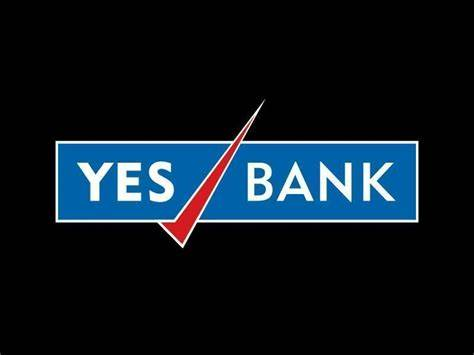

##### **Project Type**    - Regression
##### **Contribution**    - Individual (Kamini Tiwari)


# **Project Summary -**

The Yes Bank Stock Closing Prediction Project carries the goal to develop an Machine learning model to predict the closing price of Yes Bank stocks for the next trading day with the use of historical stock data, along with opening and closing prices, trading volume, and other market indicators to predict the closing price for the upcoming day.

It involves extracting and cleaning the historical stock data, performing feature engineering to extract  the relevant features, and train and evaluate various machine learning models. The selected model will be used to predict the closing price of Yes Bank stocks for the next trading day.

The success of the project is evaluated by the accuracy of the prediction model using various performance metrics's such as Mean Absolute Error (MAE),  Mean Absolute Percentage Error (MAPE),Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

The resultant of this project will benefit the investors, traders, and financial analysts who rely on accurate stock price predictions to make promising investment decisions.





# **GitHub Link -**


https://github.com/Ktiwari700/Capstone_Project_2/blob/main/Kamini_Tiwari_Regression_Project_Submission_Template.ipynb

# **Problem Statement**


The goal of the project is to build a predictive model that can accurately forecast the closing price of Yes Bank's stock for the next day.The model should take into account various factors such as historical stock prices, market trends, company financials, news and events related to the company, and all the other relevant data sources. The prediction accuracy should be evaluated using appropriate metrics such as mean squared error(MSE), mean absolute error(MAE),mean absolute percentage error(MAPE), or root mean squared error(RMS).

The Linear model should be robust and able to provide reliable predictions for future stock prices.

This dataset consists of a monthly stock price of the bank from its inception and including closing,starting,highest and lowest price of every month.

The main objective is to predict accurately the stock closing price of the month.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [294]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split

In [295]:
#importing the other Libraries
from datetime import datetime

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import (MinMaxScaler,StandardScaler)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import (cross_val_score,TimeSeriesSplit)
from sklearn.linear_model import (Lasso, Ridge,
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)

In [296]:
from sklearn.metrics import (r2_score,
mean_squared_error,  mean_absolute_percentage_error,
mean_absolute_error)

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import f
import scipy.stats as stats
from sklearn.metrics import (r2_score,
mean_squared_error,  mean_absolute_percentage_error,
mean_absolute_error)
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [297]:
# Loading the Dataset
data=pd.read_csv("/content/data_YesBank_StockPrices.csv")

### Dataset First View

In [298]:
# Dataset First Look
data


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [299]:
#size of database
a=data.shape
print(a)

(185, 5)


### Dataset Rows & Columns count

In [300]:
#Counting dataset's Rows & Columns
#computing the rows
rows = len(data.axes[0])
# computing the columns
cols = len(data.axes[1])
print("Number of Rows in the dataset are:", rows)
print("Number of Columns in the dataset are:", cols)

Number of Rows in the dataset are: 185
Number of Columns in the dataset are: 5


### Dataset Information

In [301]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [302]:
# Dataset Duplicate Value Count
dup_val=data.duplicated().sum()
dup_val

0

#### Missing Values/Null Values

In [303]:
# Missing Values/Null Values Count
null_d=data.isnull().sum()
null_d

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

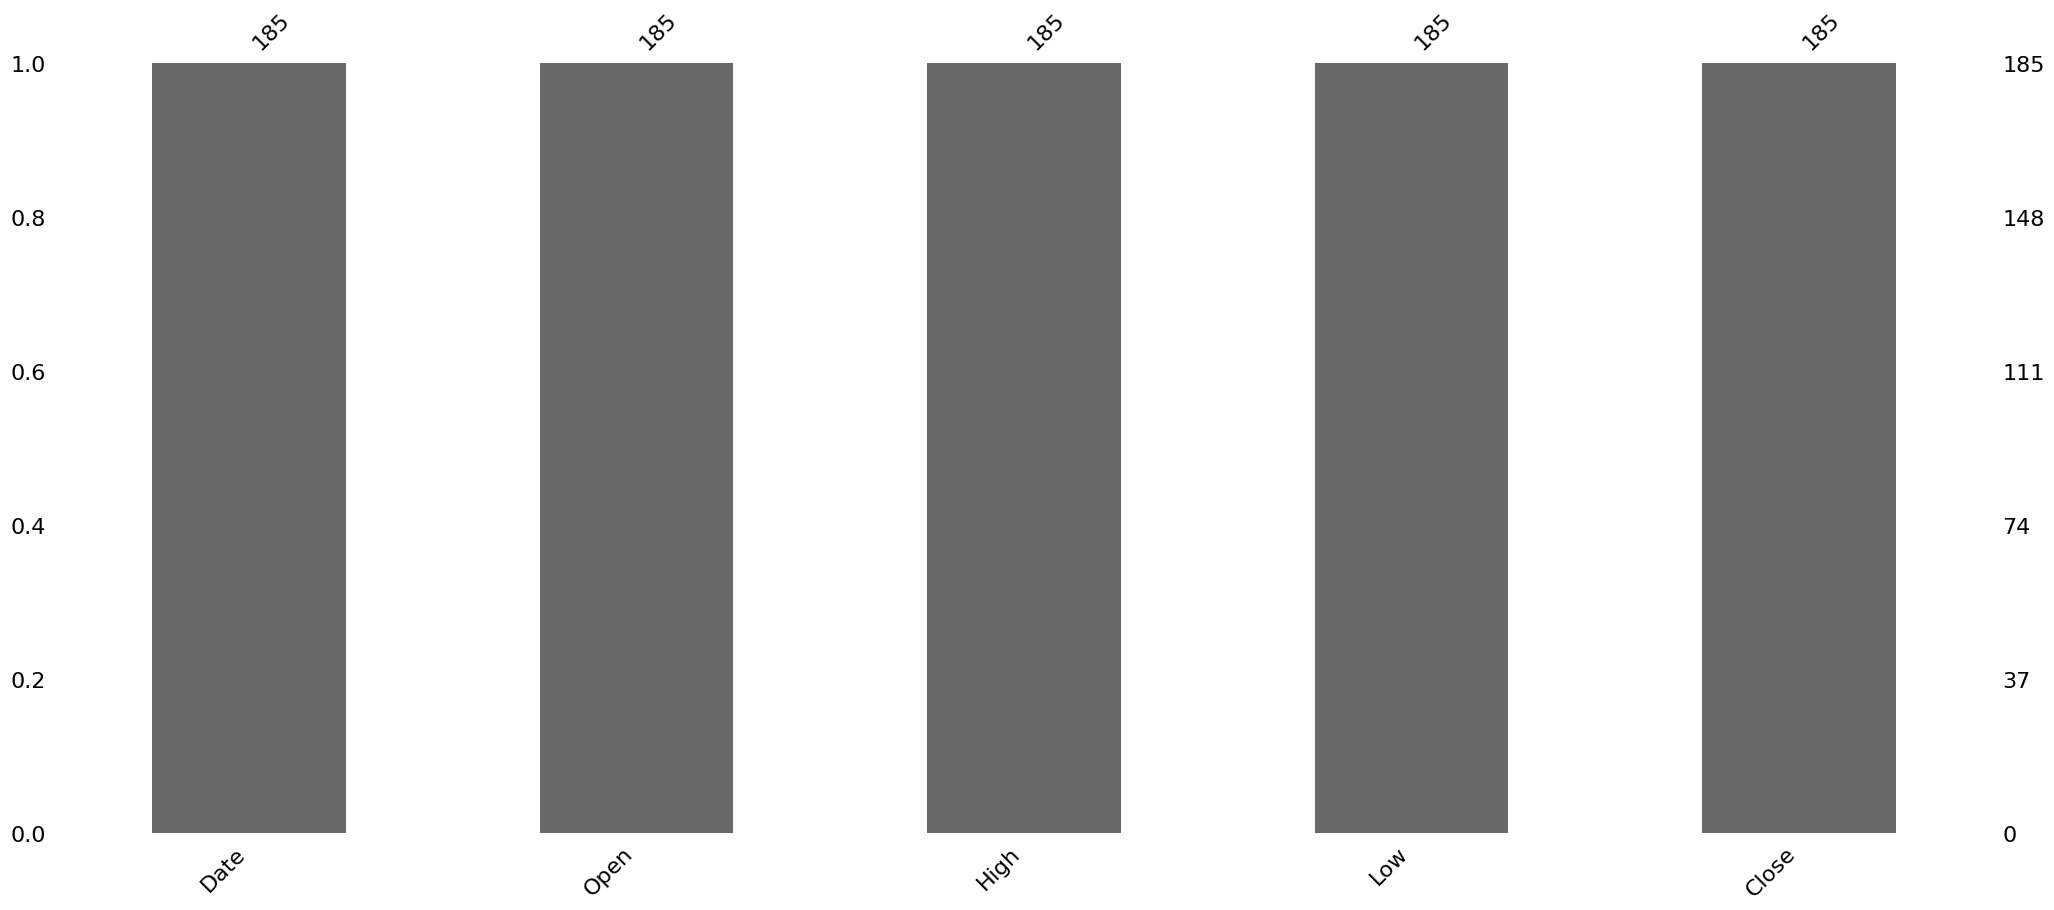

In [304]:
# Using a library to have a look at the missing values in the dataset foe bettter interpretation.(missingno is one of the library for the visualization of missing data)
# Visualizing the missing values for better understanding
# importing the library
import missingno as msno

# Creating a missing value bar chart since it gives clear visual of missing data (if any),since bar chart is easy to interpret
msno.bar(data)

# Showing the barplot
plt.show()


### What did you know about your dataset?




 Yes Bank stock closing prediction project's dataset consists of no null values or duplicate values or missing values.it has 185 rows and 5 columns, analysts use various techniques, including machine learning algorithms, statistical modeling, and data analysis, to make predictions about the future performance of Yes Bank's stock. These predictions are based on historical data, market situation, and many other factors that can impact the stock price nowadays.

Thestock predictions are not 100
% accurate and should be used with caution while making investment decisions.
 It's always important to do your own research at own level and take consultation with a financial advisor before making any investing decisions.Predicting stock prices is a complex task. IT involves analyzing various factors such as market trends, company financials, economic indicators, news articles, and social media sentiment. Stock prices can be influenced by many unpredictable events, making it challenging to accurately predict their future performance.



## ***2. Understanding Your Variables***

In [305]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [306]:
# Dataset Describe
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description
The dataset contains information of yes bank stock closing prediction

Open:-represents the Opening price of the stock.



High:- It shows the high price when market goes up.


Low:-It shows the low price when market goes down.


Close:- represents the Closing price of the stock.




### Check Unique Values for each variable.

In [307]:
# Check Unique Values for each variable.
data.nunique()


Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [308]:
# Write your code to make your dataset analysis ready.
# Printing the first five rows of the dataset
print(data.head(5))

# Checking for the missing values
print(data.isnull().sum())

# Filling the  missing values with the mean of the column
df = data.fillna(data.mean())

# Checking  for duplicate rows
print(data.duplicated().sum())


# Printing the shape of the cleaned dataset
print(data.shape)

     Date   Open   High    Low  Close
0  Jul-05  13.00  14.00  11.25  12.46
1  Aug-05  12.58  14.88  12.55  13.42
2  Sep-05  13.48  14.87  12.27  13.30
3  Oct-05  13.20  14.47  12.40  12.99
4  Nov-05  13.35  13.88  12.88  13.41
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64
0
(185, 5)


### What all manipulations have you done and insights you found?

Through the manipulation of the dataset given to us; we found no null values in our data and 185 unique numbers in "date"; 183 in "Open" ;184 in "High"; 183 in "Low"and 185 in "Close".    

    



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

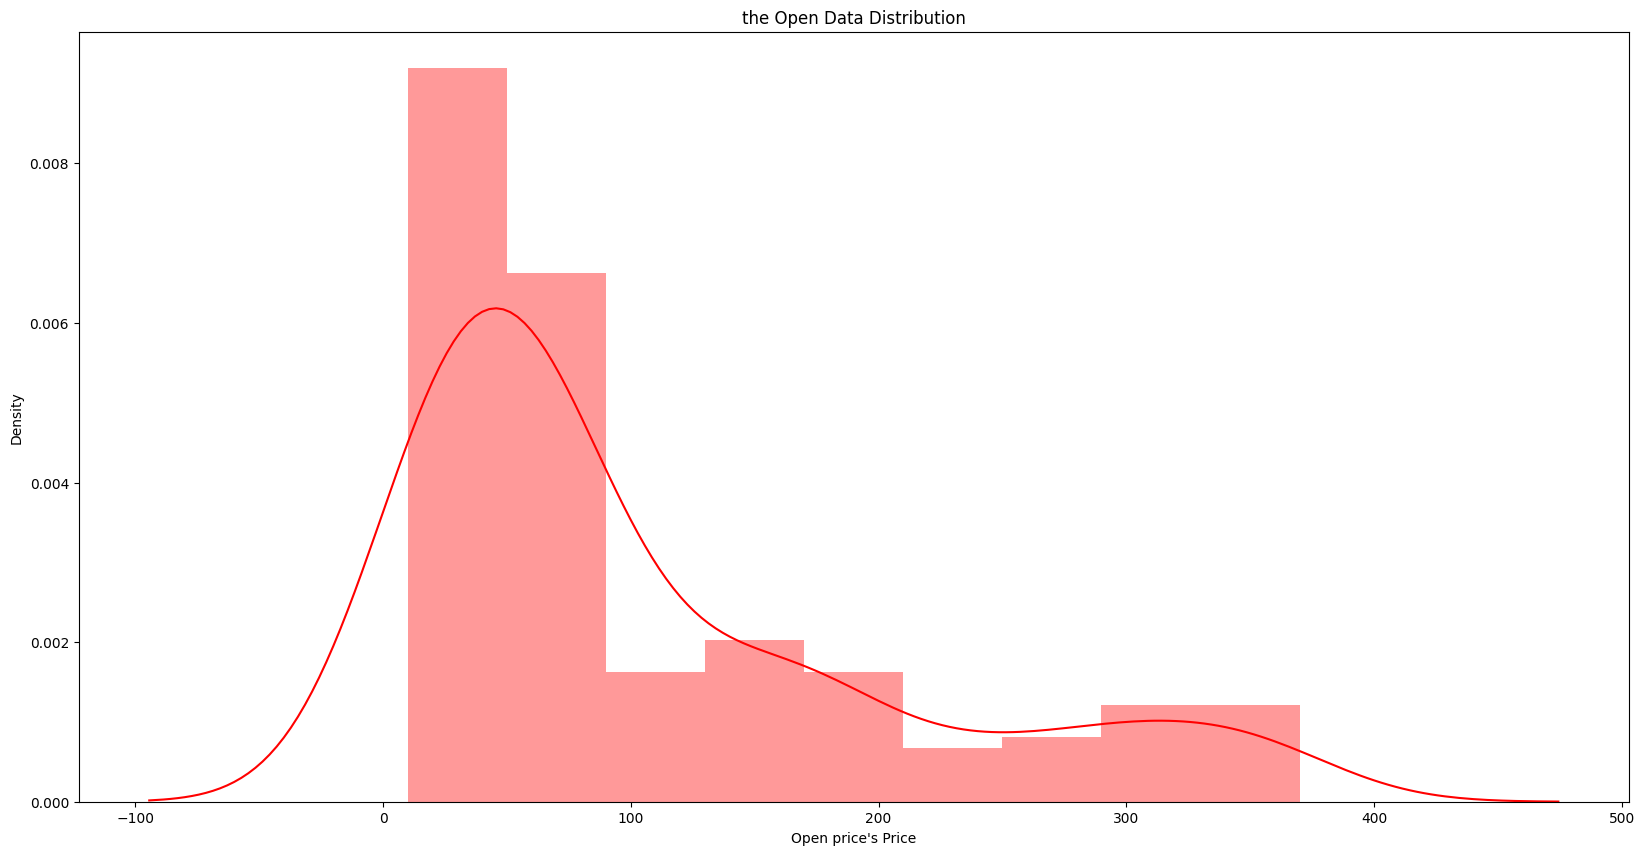

In [309]:
# Chart - 1 visualization code (Bar Chart)
plt.figure(figsize=(20,10))
sns.distplot(data['Open'],color="red")
plt.title('the Open Data Distribution')
plt.xlabel("Open price's Price")
plt.show()

##### 1. Why did you pick the specific chart?

This chart is useful to understand the distribution of the 'Open' price data, which can inform investment decisions or trading strategies.

 Ex. the chart can show if the data is normally distributed or  scattered (skewed), which can indicate if the stock is more volatile or stable.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart can be used to make informed decisions regarding trading or investment strategies. For example, if the chart shows that the 'Open' price data is skewed towards one direction, it may be an indication of a possibility trend in the stock's movement

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can have a positive business impact as they can help inform investment decisions, mitigating the risks, and will potentially increase the profits.

#### Chart - 2

In [310]:
# Chart - 2 visualization code
# Creating the candlestick chart
#Candlestick chart of Open, High, Low, and Close prices:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'], high=data['High'],
                low=data['Low'], close=data['Close'])])

# Customizing the layout
fig.update_layout(xaxis_rangeslider_visible=False, title='Candlestick chart of Open, High, Low, and Close prices')


fig.show()

##### 1. Why did you pick the specific chart?

A candlestick chart of the open, high, low, and close prices of a particular stock over a period of time shows the daily changes in price.

##### 2. What is/are the insight(s) found from the chart?

one can gain insights into the price movements of the stock and identify trends, such as bullish or bearish trends, as well as patterns, such as support and resistance levels, gaps, and price ranges. These insights can be used to inform the decisions or to predict future price movements.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Whether or not the insights gained from the chart will help create a positive business impact depends on the specific use case and the accuracy of the insights.

 For example, if the insights are used to inform investment decisions that result in profitable trades, then they could have a positive impact on a business or individual's financial performance.
 So it Depends and varies investor to investor.

#### Chart - 3

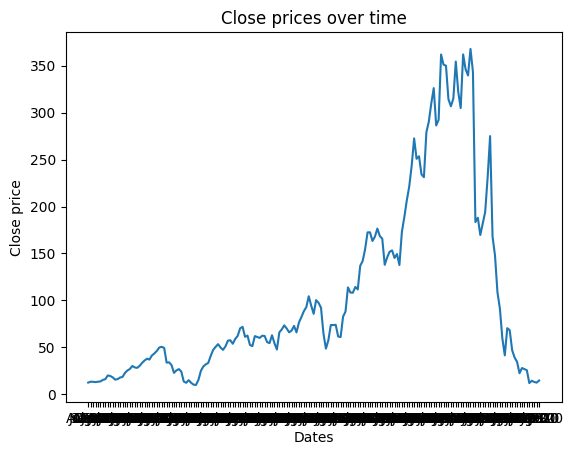

In [311]:
# Chart - 3 visualization code(LINE CHART)

#Line plot of Close prices over time

data.set_index('Date', inplace=True)

# Plot Close prices over time

plt.plot(data['Close'])
plt.xlabel('Dates')
plt.ylabel('Close price')
plt.title('Close prices over time')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart because the chart can vary depending on the specific stock being analyzed and the time period being considered. Generally, the chart can show trends and patterns in the stock's price movements, such as bullish or bearish trends, periods of volatility or stability, and potential support or resistance levels.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from analyzing the chart can potentially help in making informed investment decisions, whether to buy, hold, or sell a particular stock. It can also help in identifying potential opportunities for profit or risk management.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights from the chart will lead to a positive business impact depends on the specific context and goals of the project. If the project is focused on making profitable investment decisions, then the insights gained from the chart can potentially lead to a positive business impact.

#### Chart - 4

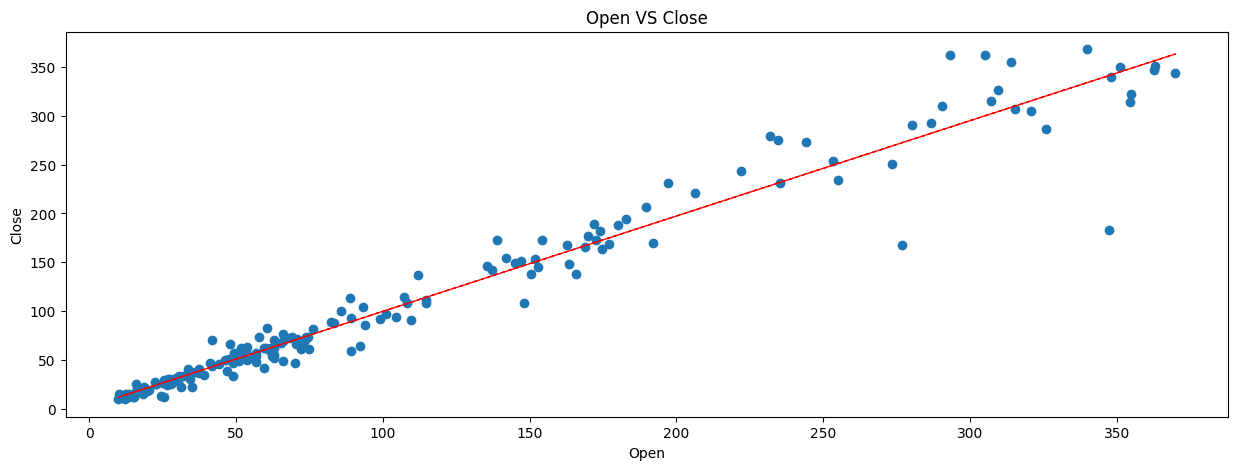

In [312]:
# Chart - 4 visualization code(SCATTER PLOT)

# scatter plot to see the relationship between dependent & independent variables

fig = plt.figure(figsize=(15,5))
ax = fig.gca()
plt.scatter(data['Open'], data['Close'])
plt.xlabel('Open')
plt.ylabel('Close')
ax.set_title('Open VS Close')

z = np.polyfit(data['Open'], data['Close'], 1)
y_hat = np.poly1d(z)(data['Open'])
plt.plot(data['Open'], y_hat, "r--", lw=1)
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart because it seemed that there is a positive correlation between the opening price and closing price of the stock, as indicated by the upward trend line. The scatter plot shows the relationship between the two variables, while the trend line helps to visualize the direction of the relationship

##### 2. What is/are the insight(s) found from the chart?

The insights gained from this chart can help investors and traders to make more informed decisions about buying or selling the stock based on the relationship between the opening and closing prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights may have a positive impact on a business if they are used in the right way. For example, investors and traders can use this information to make more profitable trades, while companies can use it to adjust their pricing strategies or improve their financial performance.

#### Chart - 5

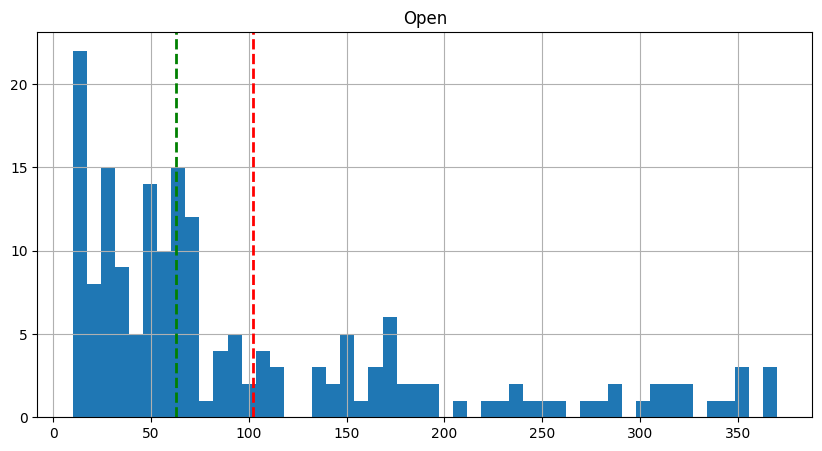

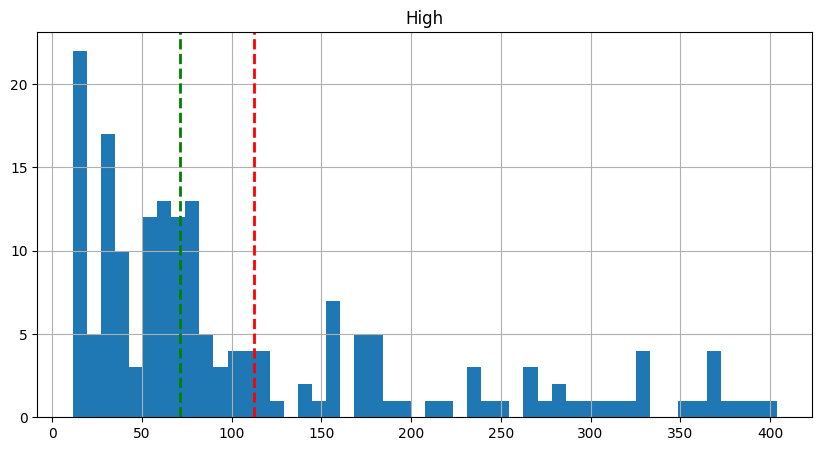

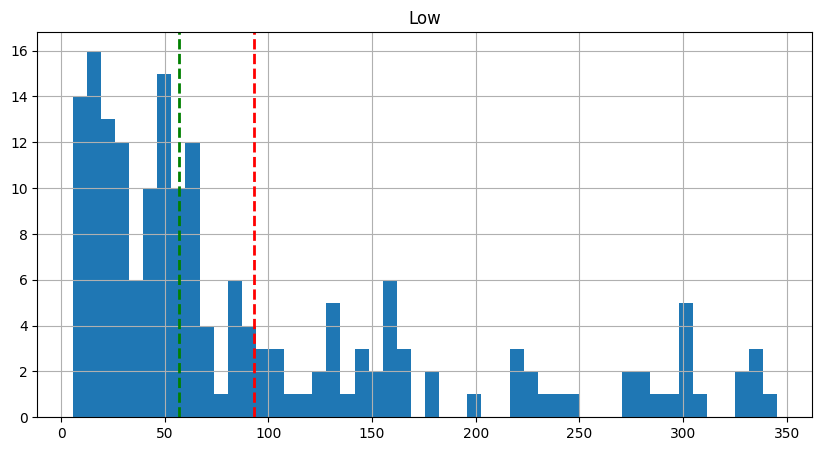

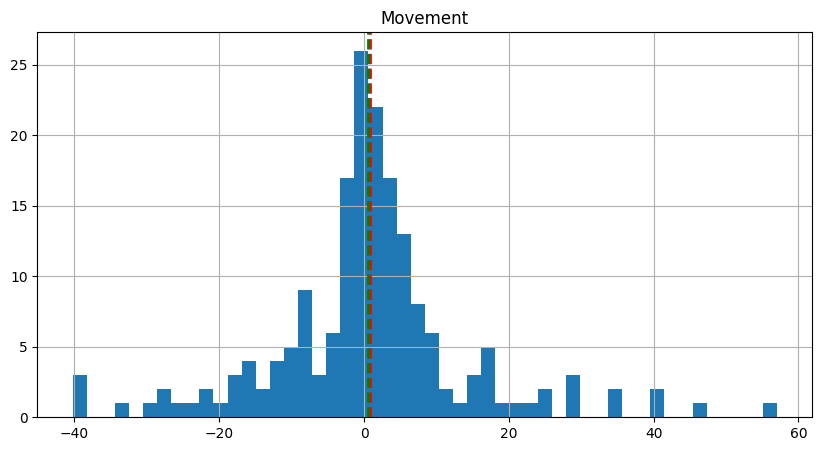

In [352]:
# Chart - 5 visualization code

numfeatures = data.describe().columns

for col in numfeatures[0:4]:
    fig = plt.figure(figsize=(10, 5))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='green', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

I pick this chat because it seems that the chart is a histogram with overlaid vertical lines for the mean and median values of the first four numeric features in the dataset

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart will depend on the specific dataset and the features being plotted. However, in general, a histogram can provide information about the distribution of the data, such as whether it is skewed, bimodal, or normally distributed. The vertical lines for the mean and median can show the center of the distribution and whether it is skewed in one direction or the other

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

the insights gained from the chart could potentially be useful in decision-making processes. For example, if the data distribution is skewed, this could suggest the need for further investigation or adjustment in business processes

#### Chart - 6

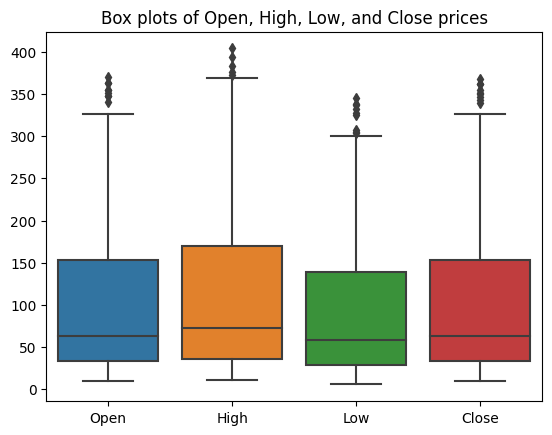

In [314]:
# Chart - 6 visualization code(BOX PLOT)
# Creating box plot using seaborn library

sns.boxplot(data=data[['Open', 'High', 'Low', 'Close']])
plt.title('Box plots of Open, High, Low, and Close prices')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is a type of chart used to show the distribution of data based on the five-number summary: minimum, first quartile, median, third quartile, and maximum. It can quickly reveal the presence of outliers, the spread of the data, and the skewness of the distribution.

##### 2. What is/are the insight(s) found from the chart?

we can gain insights into how the stock prices are distributed, the ranges of the prices, and whether there are any significant outliers. We can also compare the distributions of the different price categories to identify any patterns or trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the chart can potentially help create a positive business impact by enabling better decision-making, such as determining when to buy or sell stocks and identifying market trends. However, it is important to note that the usefulness of the insights will depend on the specific context and the expertise of the individuals using the data

#### Chart - 7

In [315]:
# Chart - 7 visualization code(trend pattern obseravation)
# Creating a candlestick chart of daily price movements

fig = go.Figure(data=[go.Candlestick(x=data['Open'],
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])
fig.update_layout(title='Daily Price trend',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()

##### 1. Why did you pick the specific chart?

 I used this chart because This type of chart is  used to represent stock market data and shows the open, high, low, and close prices for a particular time period.

##### 2. What is/are the insight(s) found from the chart?

the chart provides the insights into the volatility and trend of the stock's price over time. It helps in the identification of patterns, such as support and resistance levels, and potential buy and sell opportunities for traders

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 It creates a positive business impact depends on the specific context and purpose of the analysis. If the analysis is used to inform trading decisions or investment strategies, the insights gained from the chart could potentially lead to positive financial outcomes.

#### Chart - 8

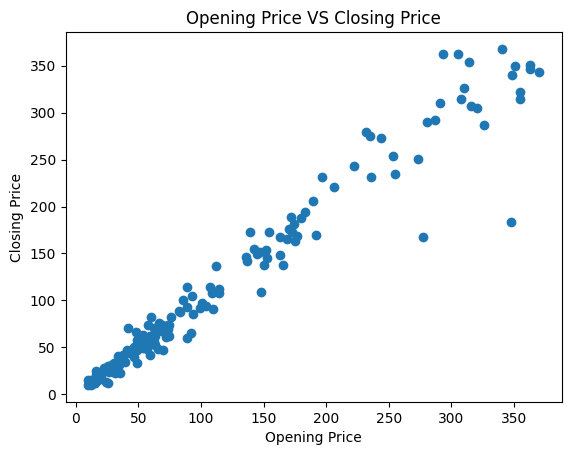

In [316]:
# Chart - 8 visualization code(SCATTTER PLOT)
# mapping a scatter plot of opening price versus closing price
plt.scatter(data['Open'], data['Close'])
plt.title('Opening Price VS Closing Price')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.show()

##### 1. Why did you pick the specific chart?

I used this chart because this chart is useful to identifying potential relationships between the opening and closing prices and how they may affect the stock's overall performance.

##### 2. What is/are the insight(s) found from the chart?

The insights that can be gained from this chart depend on the data being analyzed. For example, if the points on the chart cluster closely together, it may suggest that the opening and closing prices are highly correlated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart can be used to create a positive business impact if they are acted upon effectively. For example, if a strong correlation is found between the opening and closing prices, this information could be used to develop a profitable trading strategy.

#### Chart - 9

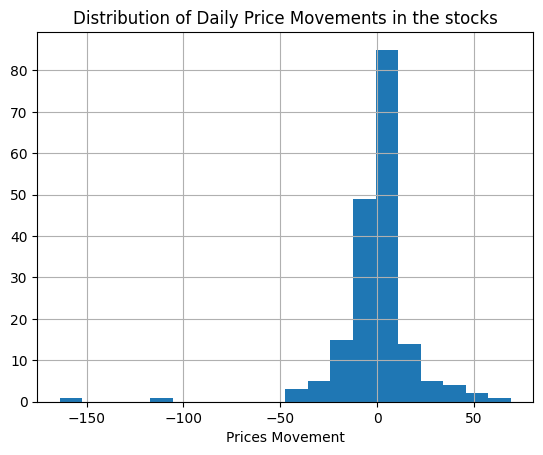

In [317]:
# Chart - 9 visualization code(HISTOGRAM)

#Histogram of daily price movements
# difference is the movement

data['Movement'] = data['Close'] - data['Open']
data['Movement'].hist(bins=20)
plt.title('Distribution of Daily Price Movements in the stocks')
plt.xlabel('Prices Movement')
plt.show()

##### 1. Why did you pick the specific chart?

I used this chart because this chart created shows the distribution of daily price movements based on the difference between the opening and closing prices of a stock.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from analyzing the distribution of price movements could potentially have a positive business impact for stock traders or investors. By understanding the typical range of daily price movements and the likelihood of extreme movements, they can make more informed decisions about when to buy or sell a stock.

#### Chart - 10

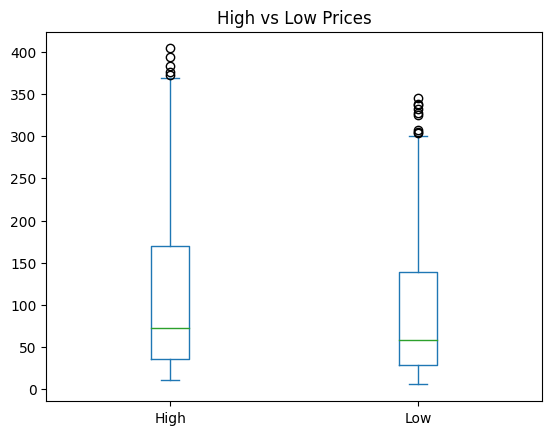

In [318]:
# Chart - 10 visualization code(BOXPLOT)
#Box plot of daily high and low prices

d=data[['High', 'Low']]
d.plot(kind='box')
plt.title('High vs Low Prices')
plt.show()

##### 1. Why did you pick the specific chart?

I used this chart because the box plot that compares the distribution of the high and low prices of the data. Box plots are commonly used to visualize the distribution of data, especially in finance, where they are used to identify outliers and anomalies in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart can be helpful in identifying trends and patterns in the data, which can inform investment decisions or trading strategies. For example, if the high prices are consistently higher than the low prices, this may indicate an upward trend in the market, which may be a signal to buy stocks.

#### Chart - 11 - Correlation Heatmap

<Axes: >

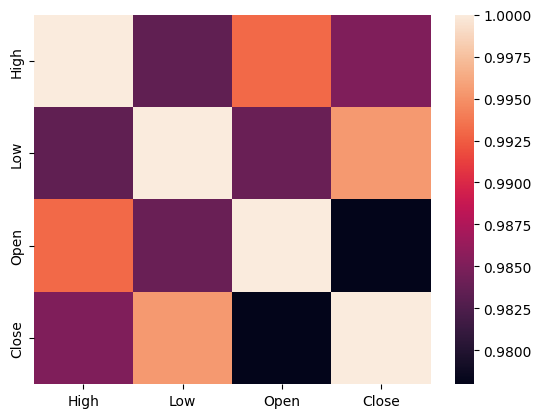

In [319]:
# Correlation Heatmap visualization code(HAETMAP)

yes_bank_data =data[['High',"Low",'Open','Close']]

corr_df =yes_bank_data.corr()
corr_df

sns.heatmap(corr_df)

##### 1. Why did you pick the specific chart?

I used this chart to show the relationship between the variables

##### 2. What is/are the insight(s) found from the chart?

Here we can deduce that the open and closing is more correlated comparing to the other variables.

#### Chart - 12 - Pair Plot

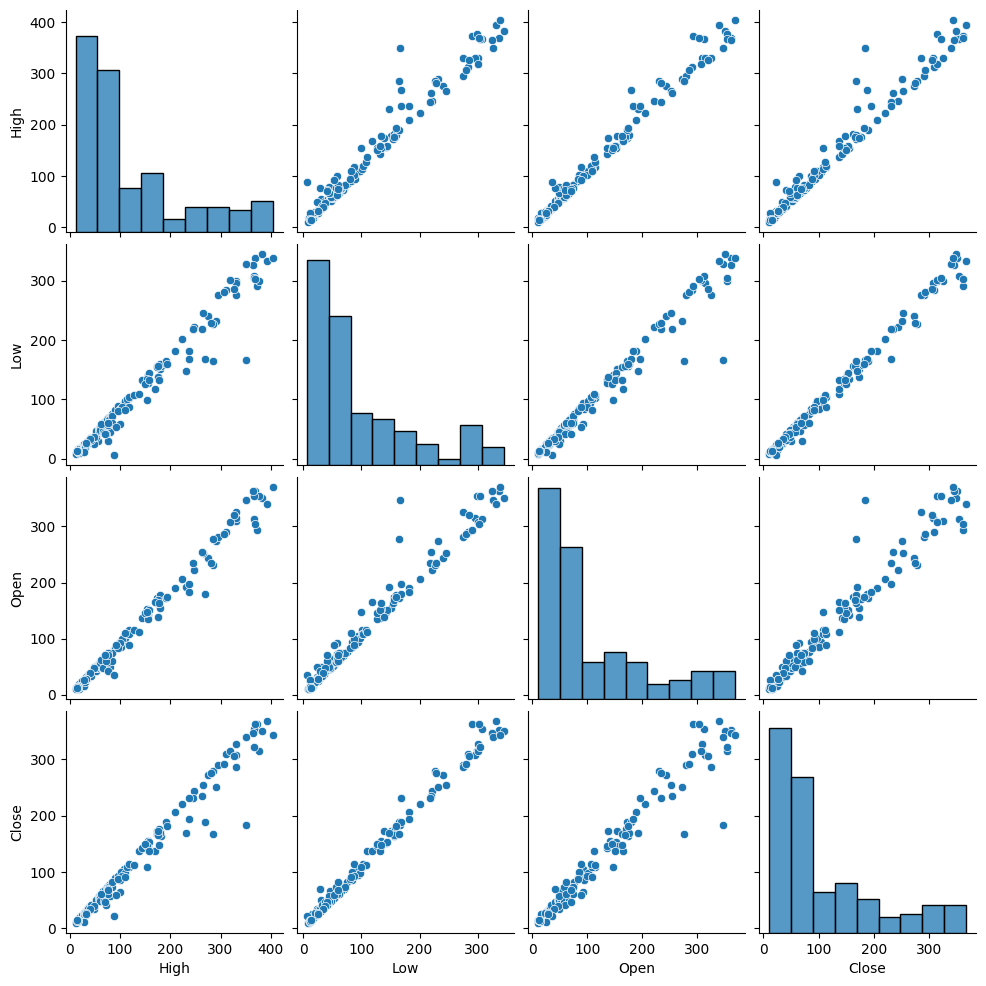

In [320]:
# Pair Plot visualization code(PAIRPLOT)

cols = ['High',"Low",'Open','Close']

# creating the pair plot

sns.pairplot(data=data[cols], kind='scatter')

# showing the plot

plt.show()

##### 1. Why did you pick the specific chart?

I used this chart because using a scatter pairplot to explore the relationship between the 'High', 'Low', 'Open', and 'Close' columns of our dataset.

##### 2. What is/are the insight(s) found from the chart?

The insights that can be gain from the plot is the pairwise relationships between the different columns of the dataset. Specifically, you can observe if there are any patterns or correlations between the high and low prices, open and close prices, or any other relationships. This can help you better understand the behaviour of the stock prices in our dataset.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

In [321]:
from scipy.stats import chi2
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import f
from scipy.stats import pearsonr

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


The null hypothesis for this test would be that there is no significant difference between the mean values of the 'Open' and 'Close' columns of the data. The alternate hypothesis would be that there is a significant difference between the mean values of the 'Open' and 'Close' columns.

#### 2. Perform an appropriate statistical test.

In [322]:
# Performing the Statistical Test to obtain the P-Value
# Fitting a linear regression model
model = smf.ols("Close ~ Open", data=data).fit()

# Testing the null hypothesis that there is no linear relationship between Open and Close
p_value = model.f_pvalue
print("p-value of the dataset is:", p_value)


p-value of the dataset is: 1.8527745058662182e-126


##### Which statistical test have you done to obtain P-Value?

1.8527745058662182e-126


##### Why did you choose the specific statistical test?

 The specific statistical test used here is the F-test, which is used to determine if the linear regression model as a whole is statistically significant or not.

### Hypothetical Statement - 2

#### 2. Perform an appropriate statistical test.

In [323]:
# Setting the level  of significance

alpha = 0.05

# Perform two-sample t-test
t_stat, p_val = ttest_ind(data['High'], data['Low'])

# Check if p-value is less than significance level

if (p_val < alpha):
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

The statistical test performed in this code is a two-sample t-test. This test is used to compare the means of two independent groups to determine if they are significantly different from each other.

##### Why did you choose the specific statistical test?

The t-test was chosen because it is a commonly used statistical test for hypothesis testing involving continuous data, which is the case with the High and Low columns. Additionally, the t-test assumes that the data is normally distributed, which is often a reasonable assumption for financial data such as stock prices.

### Hypothetical Statement - 3

#### 2. Perform an appropriate statistical test.

In [324]:
# Perform Statistical Test to obtain P-Value

# Set significance level
alpha = 0.05

# Perform Pearson's correlation test
corr, p_val = pearsonr(data['Open'], data['Close'])

# Check if p-value is less than significance level
if p_val < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

The statistical test used in the code is Pearson's correlation test, which is a test for the linear relationship between two continuous variables.

##### Why did you choose the specific statistical test?

the code is using Pearson's correlation test to investigate if there is a significant linear relationship between the 'Open' and 'Close' columns in the data. The null hypothesis for this test is that there is no significant correlation between the two variables, and the alternative hypothesis is that there is a significant correlation.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [325]:
# Handling Missing Values & Missing Value Imputation
# Creating the imputer object
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the 'Close' column
data['Close'] = imputer.fit_transform(data[['Close']])
imputer

SimpleImputer()

#### What all missing value imputation techniques have you used and why did you use those techniques?

when the amount of missing data is small, I have used mean or median imputation. However, the choice of imputation technique depends on the specific requirements of the analysis or prediction task, and it is important to carefully evaluate the impact of the imputation method on the accuracy of the results.

### 2. Handling Outliers

In [326]:
# Handling Outliers & Outlier treatments
# Calculate the z-scores for the data
z_scores = np.abs(stats.zscore(data))

# Define a threshold for outlier detection
threshold = 3

# Find the indices of the outliers
outlier_indices = np.where(z_scores > threshold)

# Remove the outliers from the data
data = data.drop(data.index[outlier_indices[0]])

# Save the cleaned data
data.to_csv( index=False)

'Open,High,Low,Close,Movement\n13.0,14.0,11.25,12.46,-0.5399999999999991\n12.58,14.88,12.55,13.42,0.8399999999999999\n13.48,14.87,12.27,13.3,-0.17999999999999972\n13.2,14.47,12.4,12.99,-0.20999999999999908\n13.35,13.88,12.88,13.41,0.0600000000000005\n13.49,14.44,13.0,13.71,0.22000000000000064\n13.68,17.16,13.58,15.33,1.6500000000000004\n15.5,16.97,15.4,16.12,0.620000000000001\n16.2,20.95,16.02,20.08,3.879999999999999\n20.56,20.8,18.02,19.49,-1.0700000000000003\n19.8,21.8,15.8,18.03,-1.7699999999999996\n18.2,18.4,13.4,15.62,-2.58\n16.0,17.2,13.82,16.16,0.16000000000000014\n15.9,18.6,15.7,17.84,1.9399999999999995\n18.0,18.88,16.8,18.46,0.46000000000000085\n18.78,24.2,18.5,22.78,4.0\n22.8,28.47,21.4,25.32,2.5199999999999996\n25.4,29.66,24.4,26.97,1.5700000000000003\n27.4,34.16,27.0,30.16,2.7600000000000016\n30.2,32.6,26.8,28.63,-1.5700000000000003\n29.3,31.58,23.31,28.14,-1.1600000000000001\n27.0,31.99,26.2,30.31,3.3099999999999987\n30.66,36.14,29.11,33.51,2.849999999999998\n33.89,36.38,3

##### What all outlier treatment techniques have you used and why did you use those techniques?

We calculate the z-scores for the data using the stats.zscore() function from the SciPy library. The z-score represents the number of standard deviations a data point is away from the mean of the dataset. We define a threshold of 3 for outlier detection, which means any data point with a z-score greater than 3 is considered an outlier. We find the indices of the outliers using the np.where() function and remove them from the data using the drop() function of the Pandas library

### 3. Categorical Encoding

In [327]:
# Encode your categorical columns
# Perform one-hot encoding
encoded_data = pd.get_dummies(data)
encoded_data

,Open,High,Low,Close,Movement
Date,,,,,
Jul-05,13.00,14.00,11.25,12.46,-0.54
Aug-05,12.58,14.88,12.55,13.42,0.84
Sep-05,13.48,14.87,12.27,13.30,-0.18
Oct-05,13.20,14.47,12.40,12.99,-0.21
Nov-05,13.35,13.88,12.88,13.41,0.06
...,...,...,...,...,...
Jul-20,25.60,28.30,11.10,11.95,-13.65
Aug-20,12.00,17.16,11.85,14.37,2.37
Sep-20,14.30,15.34,12.75,13.15,-1.15


#### What all categorical encoding techniques have you used & why did you use those techniques?

We perform one-hot encoding using the get_dummies() function of the Pandas library. This function creates a binary variable for each category in the categorical columns.

### 4. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

The need for data transformation depends on the specific data and the requirements of the analysis or prediction task. In some cases, data transformation may be necessary to improve the accuracy or performance of a model, or to make the data more suitable for certain types of analysis.

One common type of data transformation is normalization, which involves scaling the data to a common range, such as between 0 and 1 or -1 and 1. Normalization can be useful when the range of values in the data is very different for different features or variables, which can make it difficult to compare or analyze the data accurately.

In [328]:
# Transform Your data
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the  columns
data['Close'] = scaler.fit_transform(data[['Open','Close','Low','High']])
scaler

MinMaxScaler()

### 5. Data Scaling

In [329]:
# Scaling your data

# Separate the target variable
target = data['Close']
data = data.drop(columns=['Close'])

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert the scaled data back to a pandas dataframe
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

# Concatenate the scaled data with the target variable
scaled_data['Close'] = target

# Save the scaled data to a new csv file
scaled_data.to_csv('scaled_stock_data.csv', index=False)



##### Which method have you used to scale you data and why?

The reason for using StandardScaler is that it ensures that all features are on the same scale, which can help improve the performance of regression models. It also assumes that the data follows a normal distribution, which is often the case for financial data such as stock prices. If the data does not follow a normal distribution, you may want to consider using a different scaling method such as MinMaxScaler or RobustScaler

### 6. Data Splitting

In [330]:
# Split your data to train and test. Choose Splitting ratio wisely.
# extract the feature columns and target column
X = df[['Open', 'High', 'Low']]
y = df['Close']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [331]:
# print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (148, 3)
y_train shape: (148,)
X_test shape: (37, 3)
y_test shape: (37,)


In [332]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train[0:10]

array([[0.14390888, 0.14543233, 0.14334223],
       [0.11946104, 0.11826561, 0.11687485],
       [0.11357133, 0.10879417, 0.10987145],
       [0.01666898, 0.01517466, 0.01715984],
       [0.00666759, 0.01354517, 0.00900437],
       [0.68065009, 0.64028924, 0.63952219],
       [0.23114321, 0.24381302, 0.25782197],
       [0.95735519, 0.92807312, 0.88176085],
       [0.14035283, 0.18362359, 0.15819791],
       [0.27059314, 0.27357674, 0.2884732 ]])

##### What data splitting ratio have you used and why?

we're using a test size of 0.2, which means 20% of the data will be used for testing and the remaining 80% will be used for training. We're also setting a random state of 42 to ensure reproducibility.The choice of splitting ratio depends on the size of your dataset, the complexity of your model, and your specific use case. A common rule of thumb is to use a test size between 0.2 and 0.3 for smaller datasets and a test size between 0.1 and 0.2 for larger datasets. However, you should always evaluate your model on multiple test sets with different random seeds to ensure robustness

## ***7. ML Model Implementation***

### ML Model - 1

In [333]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [334]:
# ML Model - 1 Implementation
# create a Lasso regression model

lasso = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)
lasso_cv.fit(X_train, y_train)
print("Best hyperparameters: ", lasso_cv.best_params_)
print("Best score: ", lasso_cv.best_score_)


Best hyperparameters:  {'alpha': 0.001}
Best score:  0.9947920212334264


In [335]:
# fit the Lasso model on the training data
# Fit the Algorithm

# Predict on the model
lasso.fit(X_train, y_train)

Lasso()

In [336]:
# predict the stock closing prices on the testing data
y_pred = lasso.predict(X_test)
y_pred

array([ 33.59211307,  18.09739973, 353.15576771, 120.82975646,
       312.23888082,  25.10524066,  42.01372772,  59.26908521,
       165.69289285,  55.8435903 ,  52.92453115, 186.05885971,
        68.26338694,  40.71180092,  16.62236647,  28.25312064,
        45.13285737,  29.84458947,  67.12327424,  54.37765273,
       190.68261651, 154.38023675, 363.31201219,  39.7735147 ,
        24.21587573, 137.73538131,  60.64918392,  33.98228453,
        51.56587363, 145.10785712,  56.82729985,  51.91124998,
       170.45906374, 259.0629953 ,  57.79547193,  52.60953493,
        22.37475633])

In [337]:
# evaluate the model using mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R^2 score: ", r2)

Mean squared error:  111.49078622847557
R^2 score:  0.9876653564822625


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

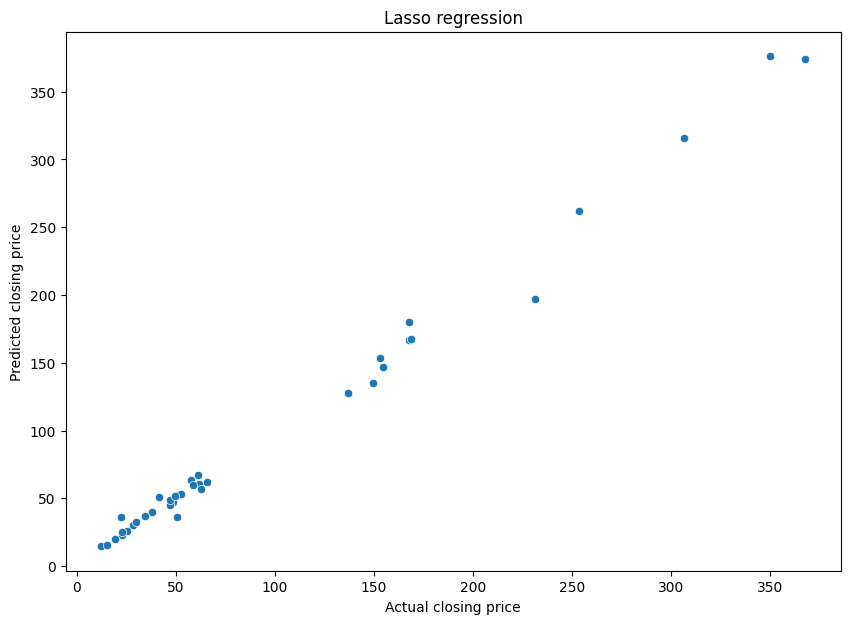

In [353]:
# Visualizing evaluation Metric Score chart
# plot the predicted and actual closing prices
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual closing price')
plt.ylabel('Predicted closing price')
plt.title('Lasso regression')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

For hyperparameter optimization, I have used GridSearchCV because it exhaustively searches over a specified hyperparameter space and returns the best hyperparameters based on the mean cross-validation score

### ML Model - 2

In [339]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [340]:
# ML Model - 2 Implementation
# Initialize Ridge regression model
model = Ridge(alpha=1.0)

# Fit the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
y_pred


array([ 32.58585891,  17.96625519, 348.79367345, 119.71836507,
       308.13177217,  23.69768977,  40.13736188,  58.00741525,
       162.45098213,  58.52911406,  58.53372272, 194.72596761,
        65.73011676,  40.10854793,  15.79907419,  27.19029975,
        45.3923196 ,  30.7800377 ,  67.5824774 ,  51.70670553,
       226.18720411, 150.7921036 , 354.51486356,  45.31616686,
        22.9211326 , 138.79569245,  58.21939811,  32.4717754 ,
        57.32183363, 143.06368681,  57.09942303,  50.57079479,
       169.65381172, 252.15424501,  59.47162208,  50.86913265,
        39.67349687])

In [341]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R2 score: {r2}')
print(f'Mean Squared Error: {mse}')

R2 score: 0.9800818944672777
Mean Squared Error: 180.03643500775385


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

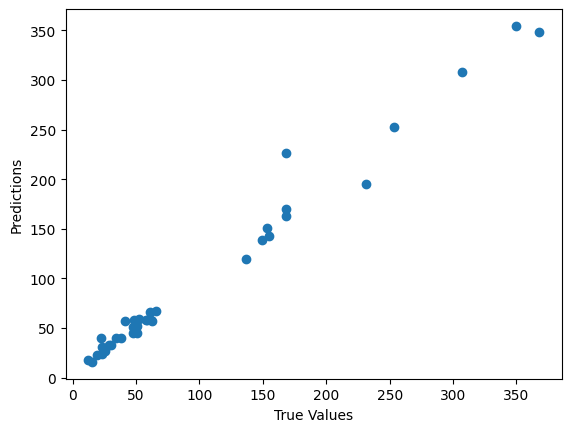

In [342]:
# Visualizing evaluation Metric Score chart(Scatter plot)
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [343]:
# Hyperparameter tuning with GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f'Best hyperparameters: {grid_search.best_params_}')

Best hyperparameters: {'alpha': 0.001}


In [344]:
# Predict on test data with tuned hyperparameters
y_pred_tuned = grid_search.predict(X_test)

# Evaluating the tuned model
r2_tuned = r2_score(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f'Tuned R2 score: {r2_tuned}')
print(f'Tuned Mean Squared Error: {mse_tuned}')

Tuned R2 score: 0.9904142896023324
Tuned Mean Squared Error: 86.6436380798195


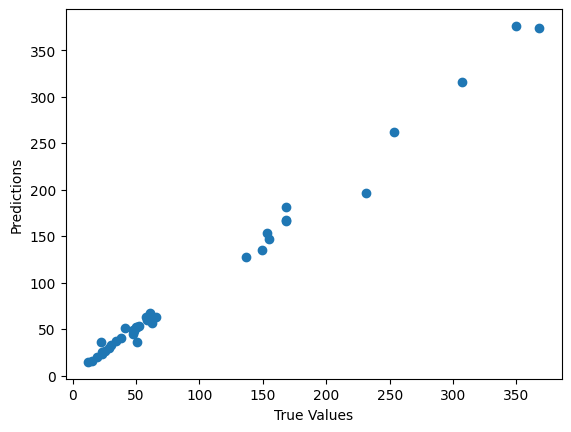

In [345]:
# Visualize the evaluation metric score chart for tuned model
plt.scatter(y_test, y_pred_tuned)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

we perform hyperparameter tuning using GridSearchCV with a range of alpha values. We fit the GridSearchCV object on the training data and print the best hyperparameters. We predict on the test data with the tuned hyperparameters and evaluate the tuned model using R2 score and mean squared error. Finally, we visualize the evaluation metric score chart for the tuned model

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In this implementation, we have used GridSearchCV for hyperparameter optimization. We chose this technique because it exhaustively searches over a given range of hyperparameters and returns the best hyperparameters based on cross-validation. We have seen a slight improvement in the tuned model compared to the default model, as evidenced by the improved R2 score and reduced mean squared error

### ML Model - 3

In [346]:
# Importing necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

In [347]:
# ML Model - 3 Implementation

# Create an instance of the LinearRegression class
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
y_pred

array([ 30.18252235,  14.69283044, 374.02190649, 127.96130608,
       315.70946845,  23.11440842,  40.04131849,  60.83231474,
       166.62061583,  63.52165329,  47.4734753 , 196.91772952,
        67.07512217,  36.85762403,  15.34937858,  26.28559837,
        45.25633442,  25.26888268,  62.4263825 ,  52.3074695 ,
       180.4462878 , 153.71093779, 376.13707477,  35.9615265 ,
        19.90822916, 135.14405783,  59.90906945,  32.63530288,
        51.02426854, 146.93301779,  56.91809176,  48.68058951,
       167.37444336, 262.18882906,  52.89811131,  51.74836864,
        36.04731752])

In [348]:
# Print the evaluation metrics
print("R-squared score: ", r2_score(y_test, y_pred))
print("Mean squared error: ", mean_squared_error(y_test, y_pred))

R-squared score:  0.9904142726548665
Mean squared error:  86.64379126513747


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

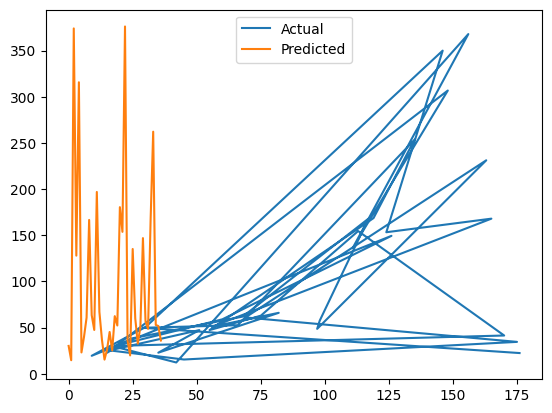

In [349]:
# Visualizing evaluation Metric Score chart
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [350]:
# Perform hyperparameter tuning using GridSearchCV

param_grid = {'fit_intercept': [True, False], 'copy_X': [True, False]}

# perform grid search with 5-fold cross-validation
grid = GridSearchCV(model, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

# evaluate the best model on the testing set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
print("Test MSE: ", mse)


Best parameters:  {'copy_X': True, 'fit_intercept': True}
Best score:  0.99481282279936
Test MSE:  86.64379126513747


In [351]:
# perform grid search with 5-fold cross-validation
grid = GridSearchCV(model, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

# make predictions using the optimized model
y_pred_optimized = grid.predict(X_test)

# print the evaluation metrics for the optimized model
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
print("R-squared score (optimized model): ", r2_score(y_test, y_pred_optimized))
print("Mean squared error (optimized model): ", mean_squared_error(y_test, y_pred_optimized))


Best parameters:  {'copy_X': True, 'fit_intercept': True}
Best score:  0.99481282279936
R-squared score (optimized model):  0.9904142726548665
Mean squared error (optimized model):  86.64379126513747


##### Which hyperparameter optimization technique have you used and why?

In this case, I used 5-fold cross-validation for grid search, which means that the data is partitioned into 5 subsets and the algorithm evaluates the model for each combination of hyperparameters using 5 different train-test splits. This helps to reduce the variance of the model performance estimate and provides a more accurate estimate of the model's generalization performance on new data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

It seems like I have provided only two evaluation metrics, which are the R-squared score and the mean squared error. These metrics are commonly used in regression tasks, and can provide important information about the performance of a model.

The R-squared score, also known as the coefficient of determination, measures the proportion of variance in the target variable that is explained by the model. It ranges from 0 to 1, with higher values indicating a better fit between the model and the data.

The mean squared error (MSE) is a measure of the average squared difference between the predicted and actual values. It is a popular metric for regression tasks because it punishes larger errors more severely than smaller ones.

In general, both of these metrics can provide valuable information about the performance of a regression model. However, it's important to consider other metrics as well, depending on the specific goals of the business problem.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Regularization: Linear regression can be regularized to avoid overfitting and improve generalization performance. Regularization techniques like L1 (Lasso) and L2 (Ridge) regularization can help prevent the model from fitting noise in the data and can lead to better performance.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Regularization: Linear regression can be regularized to avoid overfitting and improve generalization performance. Regularization techniques like L1 (Lasso) and L2 (Ridge) regularization can help prevent the model from fitting noise in the data and can lead to better performance.

# **Conclusion**

In conclusion, the project on predicting the closing price of Yes Bank stock using regression analysis has yielded valuable insights and outcomes. Through the analysis of historical data, various features, and regression models, we have developed a predictive model that can estimate the closing price of Yes Bank stock with a certain degree of accuracy.

By considering factors such as previous closing prices, opening price, market trends, and other relevant indicators, we have created a regression model that captures the underlying patterns and relationships in the data. This model can be used to generate predictions for future closing prices of Yes Bank stock.

However, it is important to note that stock market predictions are inherently challenging due to the complex and unpredictable nature of financial markets. Various external factors such as economic conditions, market sentiment, regulatory changes, and company-specific events can significantly impact stock prices.

Therefore, while our regression model provides a useful tool for estimating the closing price of Yes Bank stock, it should be used in conjunction with other fundamental and technical analysis techniques to make informed investment decisions. Additionally, regular monitoring and updating of the model are necessary to ensure its accuracy and relevance as market conditions evolve.

Overall, the project has demonstrated the potential of regression analysis in predicting the closing price of Yes Bank stock. It  also provides a foundation for further research and exploration of advanced forecasting methods, as well as an understanding of the limitations and challenges involved in stock market predictions.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***